In [1]:
using LinearAlgebra
using Distributions
using StatsPlots
default(fmt=:png)
using Random

function sim(x, β, dist, d; L=10^6)
    f(x) = evalpoly(x, β)
    n, r = length(x), d+1
    y0 = f.(x)
    A = x .^ (0:d)'
    ginvA = (A'A)\A'
    utmp = [zeros(n) for _ in 1:Threads.nthreads()]
    y = [zeros(n) for _ in 1:Threads.nthreads()]
    b = [zeros(r) for _ in 1:Threads.nthreads()]
    β̂ = zeros(r, L)
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        u = rand!(dist, utmp[tid])
        @. y[tid] = y0 + u
        mul!(b[tid], ginvA, y[tid])
        β̂[:, i] .= b[tid]
    end
    β̂
end

rd(x; sigdigits=4) = round(x; sigdigits)

function plot_sim(x, β, dist, d; L=10^6)
    f(x) = evalpoly(x, β)
    n, r = length(x), d+1
    y0 = f.(x)
    A = x .^ (0:d)'
    
    β̂ = sim(x, β, dist, d; L)
    
    PP = []
    
    @show dist mean(dist) std(dist)
    println()
    P = plot(dist; label="residual dist.")
    push!(PP, P)
    
    u = rand(dist, n)
    y = y0 + u
    P = scatter(x, y; label="example of data", msc=:auto, ms=3)
    plot!(f, extrema(x)...; label="f(x)", ls=:dash)
    push!(PP, P)
    
    @show β
    @show meanβ̂ = rd.(vec(mean(β̂; dims=2)))
    @show rd.(std(dist) * .√diag(inv(A'A)))
    @show stdβ̂ = rd.(vec(std(β̂; dims=2)))
    println()
    
    for i in 1:r
        P = stephist(β̂[i, :]; norm=true, label="betahat[$(i)]")
        plot!(Normal(meanβ̂[i], stdβ̂[i]); label="normal approx.", ls=:dash)
        push!(PP, P)
    end

    @show n d
    
    h = 1 + (r+1) ÷ 2
    plot(PP...; size=(800, 250h), layout=(h, 2))
end

expeczero(dist) = dist - mean(dist)

standardized(dist) = (dist - mean(dist)) / std(dist)

standardized (generic function with 1 method)

dist = Normal{Float64}(μ=0.0, σ=0.5)
mean(dist) = 0.0
std(dist) = 0.5

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [0.0002448, 1.0, -0.0001026, -0.1999]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.2392, 0.3214, 0.1102, 0.1025]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.2391, 0.3214, 0.1101, 0.1025]

n = 10
d = 3


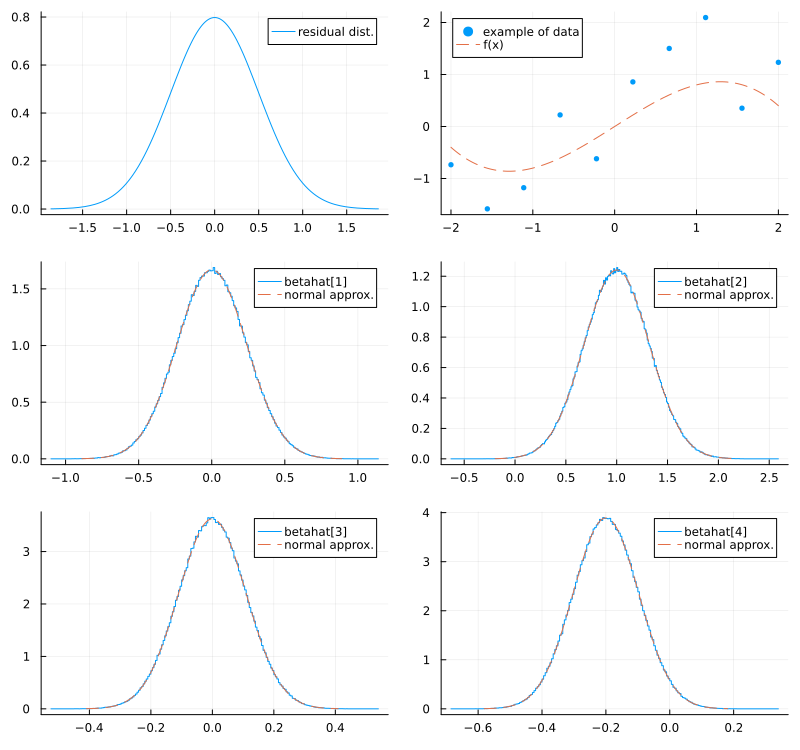

In [2]:
x = range(-2, 2, 10)
β = [0, 1, 0, -0.2]
dist = Normal(0, 0.5)
d = 3
plot_sim(x, β, dist, d)

dist = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: -0.5
σ: 1.0
ρ: Exponential{Float64}(θ=0.5)
)

mean(dist) = 0.0
std(dist) = 0.5

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [-0.0004194, 0.9998, 0.0001394, -0.1999]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.2392, 0.3214, 0.1102, 0.1025]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.2389, 0.3215, 0.11, 0.1025]

n = 10
d = 3


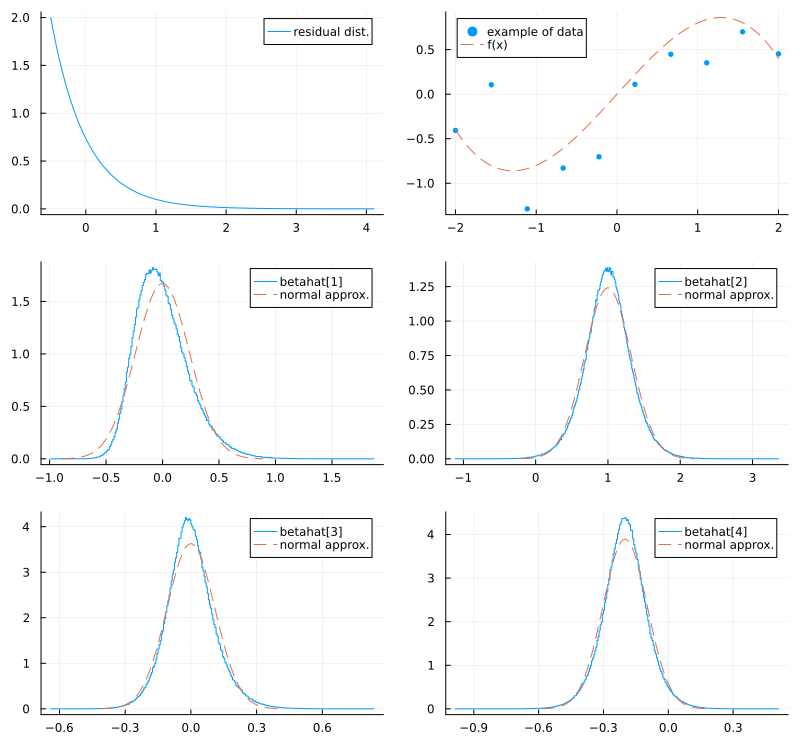

In [3]:
x = range(-2, 2, 10)
β = [0, 1, 0, -0.2]
dist = expeczero(Exponential(0.5))
d = 3
plot_sim(x, β, dist, d)

dist = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: -0.5
σ: 1.0
ρ: Exponential{Float64}(θ=0.5)
)

mean(dist) = 0.0
std(dist) = 0.5

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [6.861e-6, 1.0, -2.755e-5, -0.2]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.1681, 0.2323, 0.08514, 0.08067]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.1682, 0.2323, 0.08514, 0.08075]

n = 20
d = 3


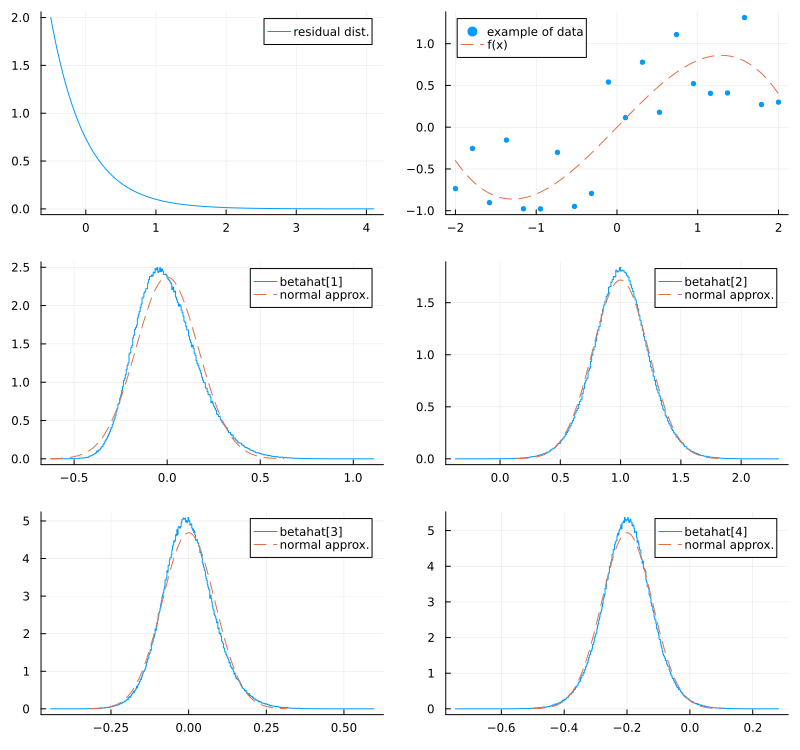

In [4]:
x = range(-2, 2, 20)
β = [0, 1, 0, -0.2]
dist = expeczero(Exponential(0.5))
d = 3
plot_sim(x, β, dist, d)

dist = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: -0.5
σ: 1.0
ρ: Exponential{Float64}(θ=0.5)
)

mean(dist) = 0.0
std(dist) = 0.5

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [-9.259e-5, 1.0, 0.0001017, -0.2001]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.1186, 0.1673, 0.06312, 0.06085]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.1187, 0.1672, 0.06309, 0.06083]

n = 40
d = 3


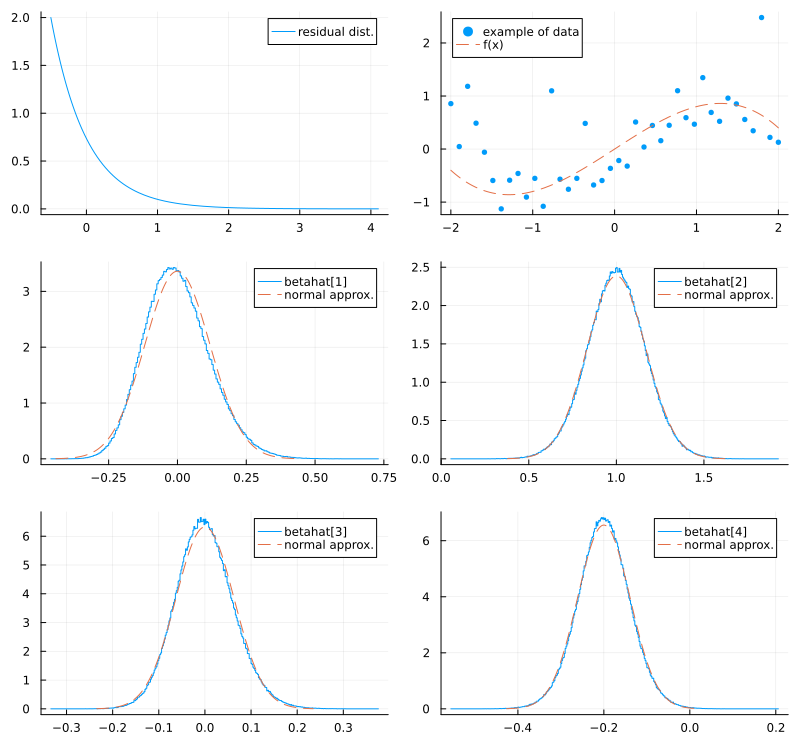

In [5]:
x = range(-2, 2, 40)
β = [0, 1, 0, -0.2]
dist = expeczero(Exponential(0.5))
d = 3
plot_sim(x, β, dist, d)

dist = LocationScale{Float64, Continuous, LogNormal{Float64}}(
μ: -0.3814369891834451
σ: 0.23135322868823557
ρ: LogNormal{Float64}(μ=0.0, σ=1.0)
)

mean(dist) = 0.0
std(dist) = 0.5

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [0.0004269, 0.9997, -0.000146, -0.1999]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.2392, 0.3214, 0.1102, 0.1025]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.2396, 0.3212, 0.1102, 0.1024]

n = 10
d = 3


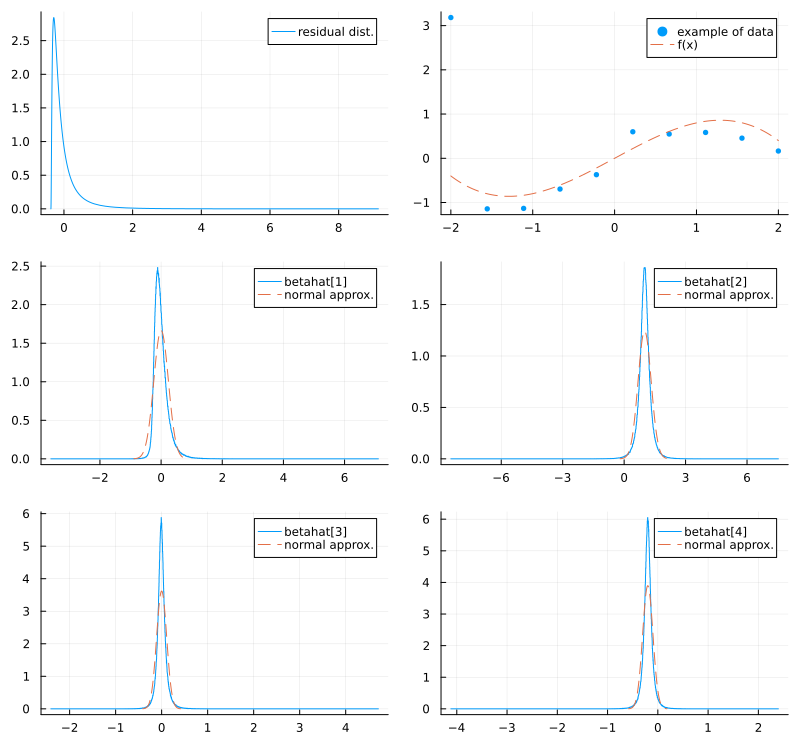

In [6]:
x = range(-2, 2, 10)
β = [0, 1, 0, -0.2]
dist = 0.5standardized(LogNormal())
d = 3
plot_sim(x, β, dist, d)

dist = LocationScale{Float64, Continuous, LogNormal{Float64}}(
μ: -0.3814369891834451
σ: 0.23135322868823557
ρ: LogNormal{Float64}(μ=0.0, σ=1.0)
)

mean(dist) = 0.0
std(dist) = 0.5

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [-6.368e-5, 1.0, 1.205e-5, -0.1999]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.1681, 0.2323, 0.08514, 0.08067]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.1679, 0.2321, 0.08514, 0.0807]

n = 20
d = 3


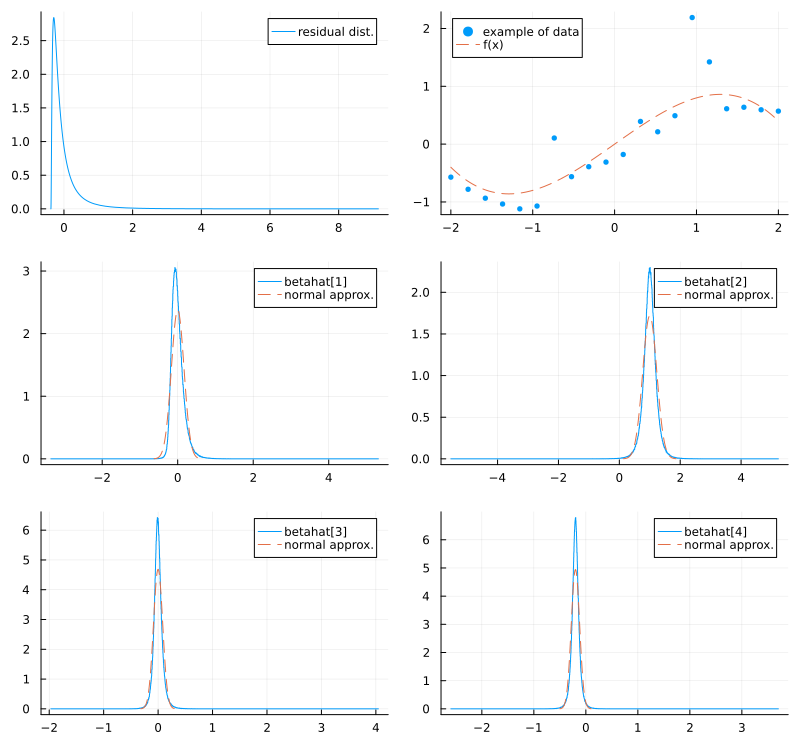

In [7]:
x = range(-2, 2, 20)
β = [0, 1, 0, -0.2]
dist = 0.5standardized(LogNormal())
d = 3
plot_sim(x, β, dist, d)

dist = LocationScale{Float64, Continuous, LogNormal{Float64}}(
μ: -0.3814369891834451
σ: 0.23135322868823557
ρ: LogNormal{Float64}(μ=0.0, σ=1.0)
)

mean(dist) = 0.0
std(dist) = 0.5

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [-0.0001601, 1.0, 7.796e-5, -0.2]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.1186, 0.1673, 0.06312, 0.06085]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.1185, 0.1671, 0.06293, 0.06076]

n = 40
d = 3


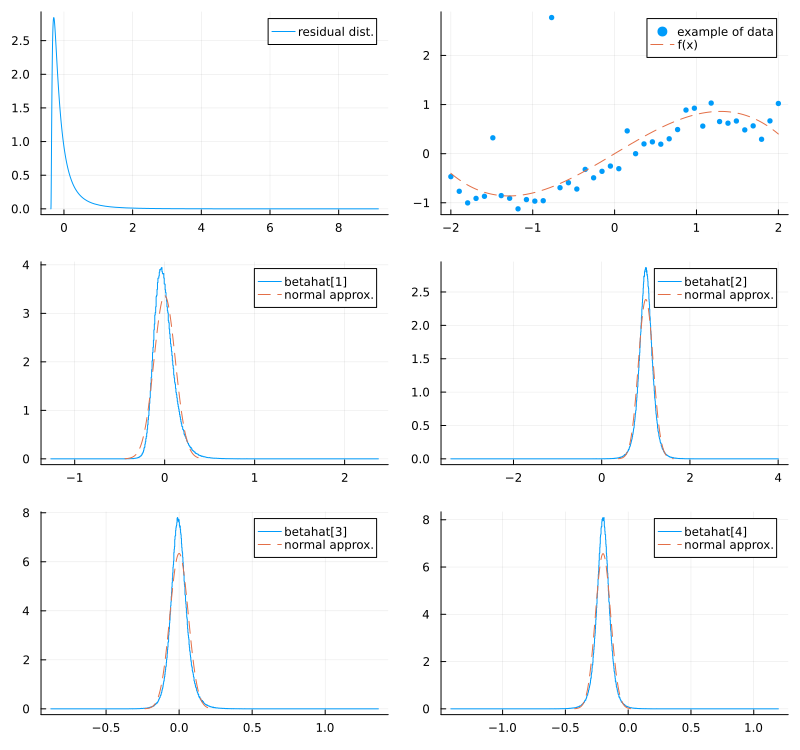

In [8]:
x = range(-2, 2, 40)
β = [0, 1, 0, -0.2]
dist = 0.5standardized(LogNormal())
d = 3
plot_sim(x, β, dist, d)

dist = LocationScale{Float64, Continuous, LogNormal{Float64}}(
μ: -0.3814369891834451
σ: 0.23135322868823557
ρ: LogNormal{Float64}(μ=0.0, σ=1.0)
)

mean(dist) = 0.0
std(dist) = 0.5

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [2.499e-5, 1.0, -1.185e-5, -0.2]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.08386, 0.1196, 0.04573, 0.04456]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.08379, 0.1195, 0.04574, 0.04458]

n = 80
d = 3


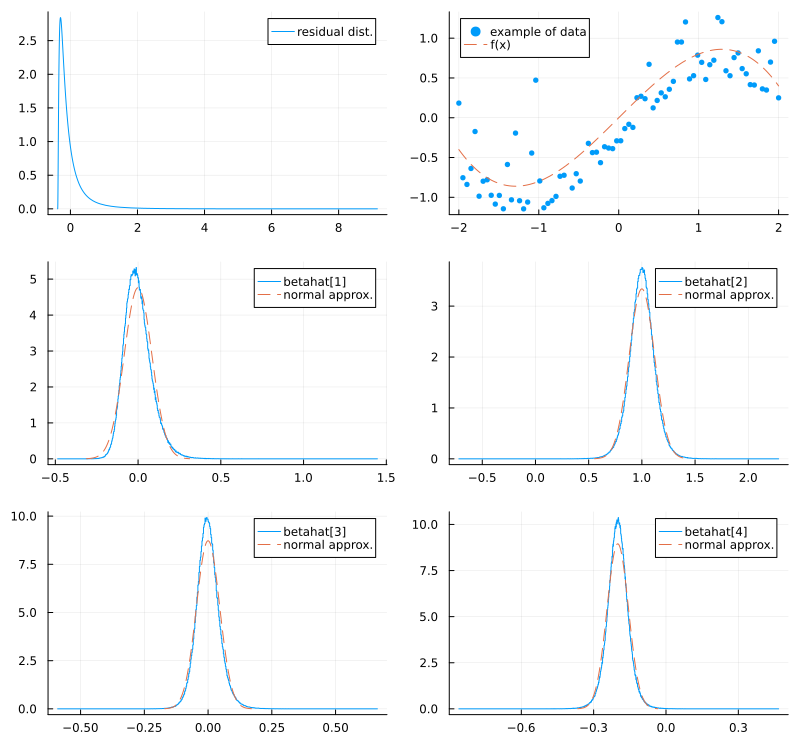

In [9]:
x = range(-2, 2, 80)
β = [0, 1, 0, -0.2]
dist = 0.5standardized(LogNormal())
d = 3
plot_sim(x, β, dist, d)

dist = LocationScale{Float64, Continuous, LogNormal{Float64}}(
μ: -0.3814369891834451
σ: 0.23135322868823557
ρ: LogNormal{Float64}(μ=0.0, σ=1.0)
)

mean(dist) = 0.0
std(dist) = 0.5

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [-2.749e-5, 0.9999, -9.377e-7, -0.2]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.05929, 0.08506, 0.03274, 0.03208]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.05942, 0.08517, 0.03279, 0.03212]

n = 160
d = 3


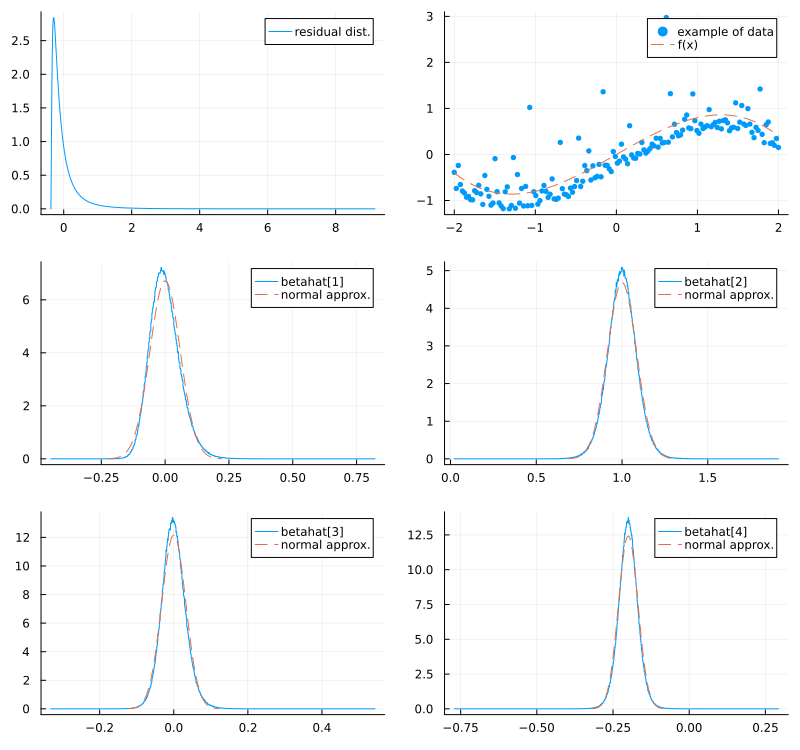

In [10]:
x = range(-2, 2, 160)
β = [0, 1, 0, -0.2]
dist = 0.5standardized(LogNormal())
d = 3
plot_sim(x, β, dist, d)

dist = LocationScale{Float64, Continuous, LogNormal{Float64}}(
μ: -0.3814369891834451
σ: 0.23135322868823557
ρ: LogNormal{Float64}(μ=0.0, σ=1.0)
)

mean(dist) = 0.0
std(dist) = 0.5

β = [0.0, 1.0, 0.0, -0.2]
meanβ̂ = rd.(vec(mean(β̂; dims = 2))) = [3.115e-5, 1.0, -2.245e-5, -0.2]
rd.(std(dist) * .√(diag(inv(A' * A)))) = [0.04193, 0.06033, 0.02329, 0.0229]
stdβ̂ = rd.(vec(std(β̂; dims = 2))) = [0.04194, 0.06042, 0.02329, 0.02291]

n = 320
d = 3


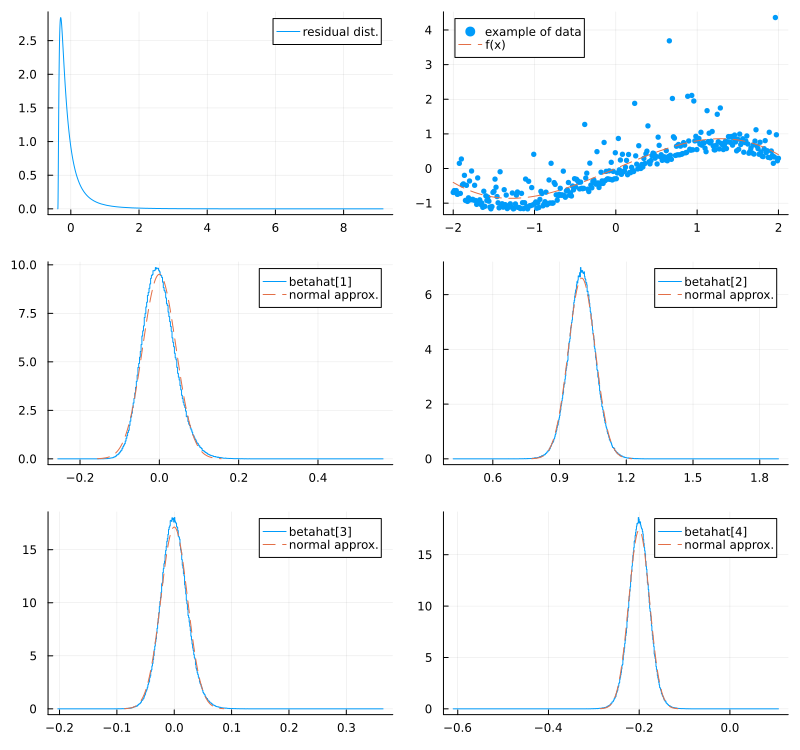

In [11]:
x = range(-2, 2, 320)
β = [0, 1, 0, -0.2]
dist = 0.5standardized(LogNormal())
d = 3
plot_sim(x, β, dist, d)